Import Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, confusion_matrix, classification_report

Load dataset

In [ ]:
df = pd.read_csv('winequality-red.csv', sep=';')
print(df.head())

FileNotFoundError: [Errno 2] No such file or directory: 'winequality-red.csv'

Checking the Missing Values

In [ ]:
print(df.info())
print(df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides        

New feature

In [ ]:
X = df[['alcohol']]
y = df['quality']

Plot histogram

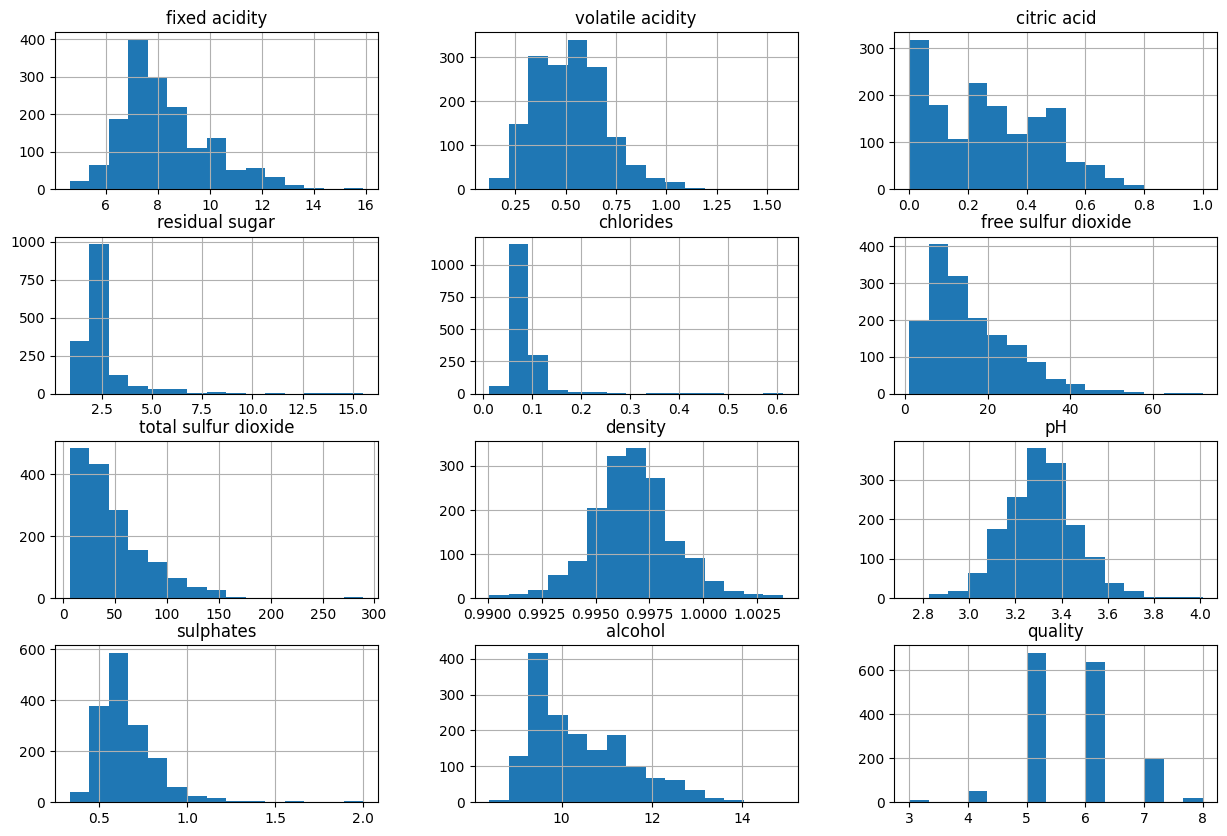

In [ ]:
df.hist(bins=15, figsize=(15,10))
plt.show()

Correlation Heatmap

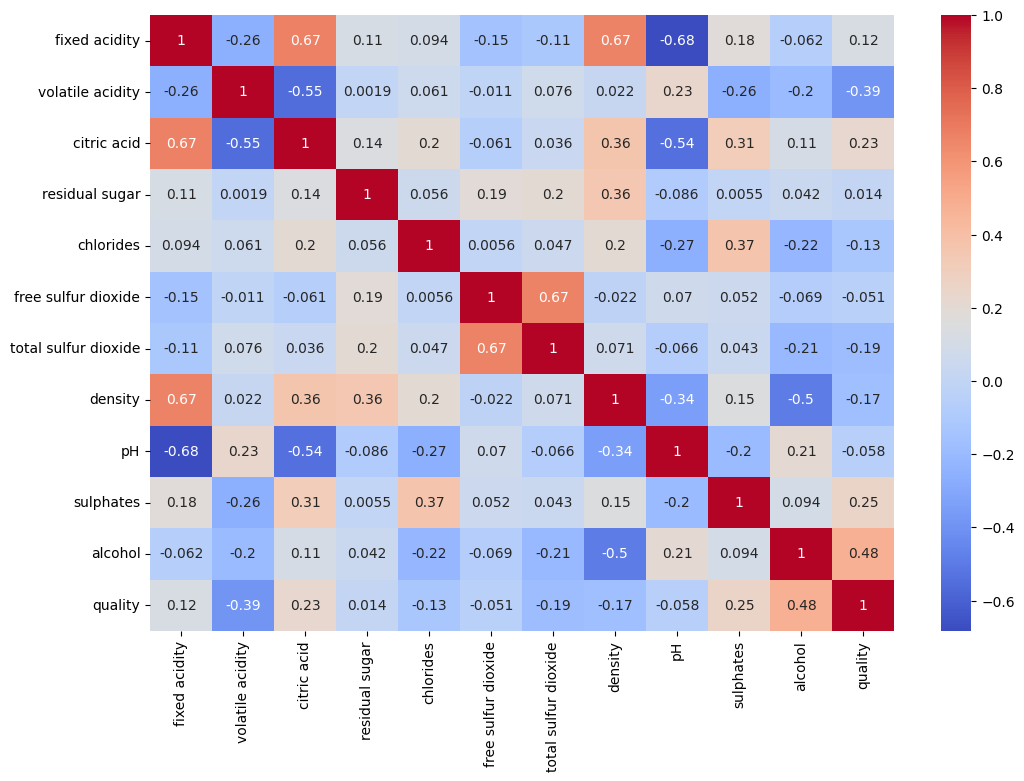

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

Features and target for Regression

In [ ]:
X = df.drop('quality', axis=1)
y = df['quality']

Fitting

In [ ]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

Feature Scaling

In [ ]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# **Linear Regression Model**

In [ ]:
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

Evaluate Regression Model

In [ ]:
print("MSE:", mean_squared_error(y_test, y_pred))
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred)))
print("R² Score:", r2_score(y_test, y_pred))

MSE: 0.390025143963955
RMSE: 0.624519930798013
R² Score: 0.40318034127962177


Plot scatter and regression line

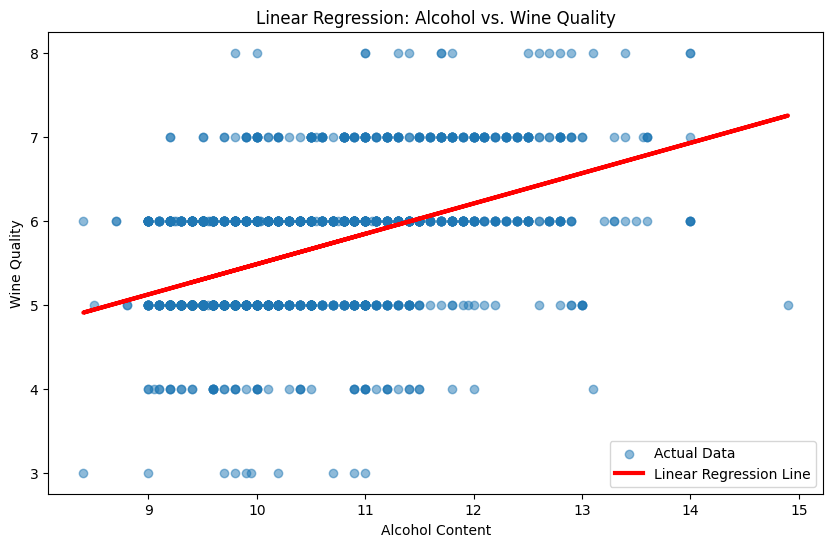

In [ ]:
X_alcohol = df[['alcohol']]
y = df['quality']

lr_alcohol = LinearRegression()
lr_alcohol.fit(X_alcohol, y)
y_pred_alcohol = lr_alcohol.predict(X_alcohol)

plt.figure(figsize=(10, 6))
plt.(X_alcohol, y, alpha=0.5, label='Actual Data')
plt.plot(X_alcohol, y_pred_alcohol, color='red', linewidth=3, label='Linear Regression Line')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality')
plt.title('Linear Regression: Alcohol vs. Wine Quality')
plt.legend()
plt.show()

Classification: good(1) or bad(0)

In [ ]:
df['quality_label'] = df['quality'].apply(lambda x: 1 if x >= 7 else 0)

data for classification

In [ ]:
X = df.drop(['quality', 'quality_label'], axis=1)
y = df['quality_label']

Feature Scaling

In [ ]:
X_scaled = scaler.fit_transform(X)

Train-test split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Logistic Regression **Model**

In [ ]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

Classification Model

In [ ]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[264   9]
 [ 34  13]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.92       273
           1       0.59      0.28      0.38        47

    accuracy                           0.87       320
   macro avg       0.74      0.62      0.65       320
weighted avg       0.84      0.87      0.84       320



Confusion matrix plotting

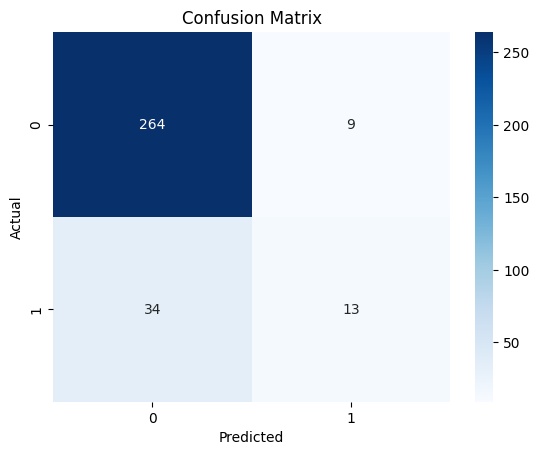

In [ ]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

Scatter Plot : Actual vs Wine Quality

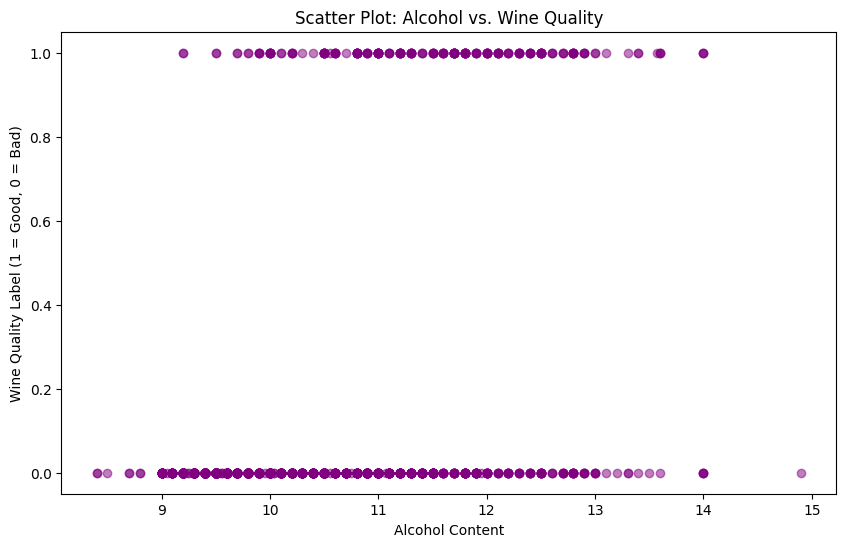

In [ ]:
plt.figure(figsize=(10,6))
plt.scatter(df['alcohol'], df['quality_label'], alpha=0.5, color='purple')
plt.xlabel('Alcohol Content')
plt.ylabel('Wine Quality Label (1 = Good, 0 = Bad)')
plt.title('Scatter Plot: Alcohol vs. Wine Quality')
plt.show()

Curve for Logitic regression

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


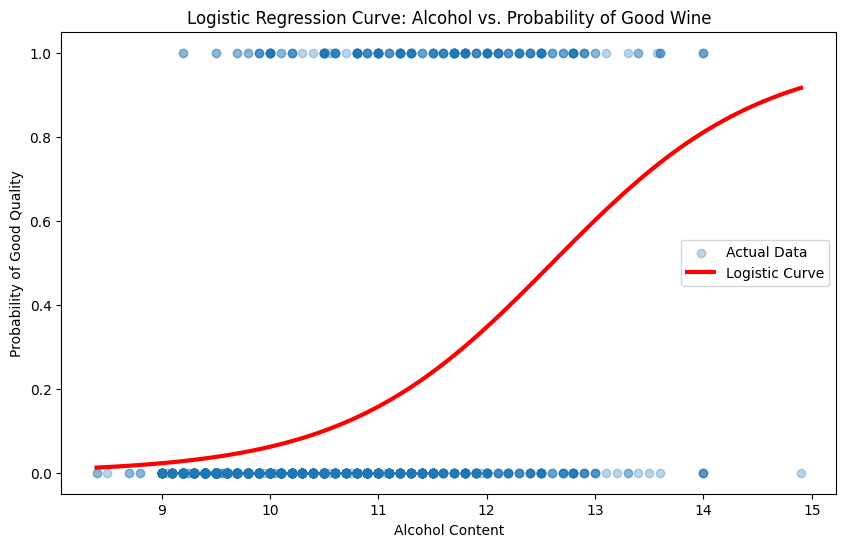

In [ ]:
plt.figure(figsize=(10, 6))

X_alcohol = X[['alcohol']]

X_curve = np.linspace(X_alcohol.min(), X_alcohol.max(), 100).reshape(-1, 1)
alcohol_scaler = StandardScaler()
alcohol_scaler.fit(X_alcohol)

X_curve_scaled = alcohol_scaler.transform(X_curve)


alcohol_log_reg = LogisticRegression()
alcohol_log_reg.fit(alcohol_scaler.transform(X_alcohol), y)
y_curve = alcohol_log_reg.predict_proba(X_curve_scaled)[:, 1]

plt.scatter(X_alcohol, y, alpha=0.3, label='Actual Data')
plt.plot(X_curve, y_curve, color='red', linewidth=3, label='Logistic Curve')

plt.xlabel('Alcohol Content')
plt.ylabel('Probability of Good Quality')
plt.title('Logistic Regression Curve: Alcohol vs. Probability of Good Wine')
plt.legend()
plt.show()
